In [1]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff


# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# for path
import os
dirs = os.listdir('../Online Retail (Clustering Using K-Means and Hierarchal)/')
for x in dirs:
    print (x)

.ipynb_checkpoints
397875_764509_compressed_OnlineRetail.csv.zip
Online Retail Clustering Using K-Means and Hierarchal .ipynb
OnlineRetail.csv


## Import Data

In [3]:
data = pd.read_csv('../Online Retail (Clustering Using K-Means and Hierarchal)/OnlineRetail.csv', sep=",", encoding="ISO-8859-1", header=0)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.shape

(541909, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Data Cleansing

### Handling Missing Data

In [7]:
import missingno as msno

def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [8]:
miss_values = null_values(data)
miss_values

Dataframe has 8 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
CustomerID,135080,24.9
Description,1454,0.3


In [9]:
retail = data.dropna()
retail.shape

(406829, 8)

In [10]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null object
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [11]:
# Changing the datatype of Customer Id as per Business understanding

retail['CustomerID'] = retail['CustomerID'].astype(str)

In [12]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null object
UnitPrice      406829 non-null float64
CustomerID     406829 non-null object
Country        406829 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 27.9+ MB


In [13]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom


## Data Preparation

We are going to analysis the Customers based on below 3 factors:
* R (Recency): Number of days since last purchase
* F (Frequency): Number of tracsactions
* M (Monetary): Total amount of transactions (revenue contributed)

### A. Monetary

In [18]:
## Create New Attribute   (Quantity * UnitPrice)

retail['Amount'] = retail['Quantity']*retail['UnitPrice']

In [19]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [20]:
retail.groupby('CustomerID').head()        ## hanya melakukan gruping

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541768,581578,POST,POSTAGE,3,9/12/2011 12:16,18.00,12713.0,Germany,54.00
541769,581578,21124,SET/10 BLUE POLKADOT PARTY CANDLES,24,9/12/2011 12:16,1.25,12713.0,Germany,30.00
541770,581578,21122,SET/10 PINK POLKADOT PARTY CANDLES,24,9/12/2011 12:16,1.25,12713.0,Germany,30.00
541771,581578,21121,SET/10 RED POLKADOT PARTY CANDLES,24,9/12/2011 12:16,1.25,12713.0,Germany,30.00


In [21]:
## Grup berdasarkan CustomerID kemudian dijumlahkan nilai 'Amount'nya

rfm_m = retail.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


### Frequency

In [22]:
# New Attribute : Frequency

rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [23]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


### Recency

In [24]:
a =  pd.to_datetime(retail.InvoiceDate)

In [25]:
a

0        2010-01-12 08:26:00
1        2010-01-12 08:26:00
2        2010-01-12 08:26:00
3        2010-01-12 08:26:00
4        2010-01-12 08:26:00
                 ...        
541904   2011-09-12 12:50:00
541905   2011-09-12 12:50:00
541906   2011-09-12 12:50:00
541907   2011-09-12 12:50:00
541908   2011-09-12 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

In [26]:
b = a.dt.strftime('%d-%m-%Y %H:%M')
b

0         12-01-2010 08:26
1         12-01-2010 08:26
2         12-01-2010 08:26
3         12-01-2010 08:26
4         12-01-2010 08:26
                ...       
541904    12-09-2011 12:50
541905    12-09-2011 12:50
541906    12-09-2011 12:50
541907    12-09-2011 12:50
541908    12-09-2011 12:50
Name: InvoiceDate, Length: 406829, dtype: object

In [27]:
retail['InvoiceDate']= pd.to_datetime(b,format='%d-%m-%Y %H:%M')
retail['InvoiceDate']

0        2010-01-12 08:26:00
1        2010-01-12 08:26:00
2        2010-01-12 08:26:00
3        2010-01-12 08:26:00
4        2010-01-12 08:26:00
                 ...        
541904   2011-09-12 12:50:00
541905   2011-09-12 12:50:00
541906   2011-09-12 12:50:00
541907   2011-09-12 12:50:00
541908   2011-09-12 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

In [28]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null object
Country        406829 non-null object
Amount         406829 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 31.0+ MB


In [29]:
# Compute the maximum date to know the last transaction date
max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-10 17:19:00')

In [30]:
# Compute the difference between max date and transaction date

retail['Diff'] = max_date - retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,697 days 08:53:00
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,697 days 08:53:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00


In [31]:
# Compute last transaction date to get the recency of customers

rfm_p = retail.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,326 days 07:02:00
1,12347.0,40 days 04:54:00
2,12348.0,76 days 04:06:00
3,12349.0,19 days 07:28:00
4,12350.0,311 days 01:18:00


In [32]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,326
1,12347.0,40
2,12348.0,76
3,12349.0,19
4,12350.0,311


In [33]:
#Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,326
1,12347.0,4310.00,182,40
2,12348.0,1797.24,31,76
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,311


## Outliers Check

Text(0.5, 0, 'Attributes')

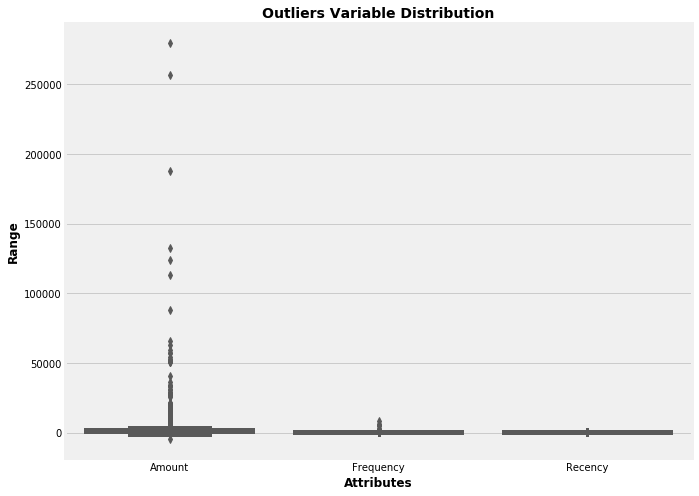

In [34]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

### Remove Outliers Using IQR

In [35]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

Text(0.5, 0, 'Attributes')

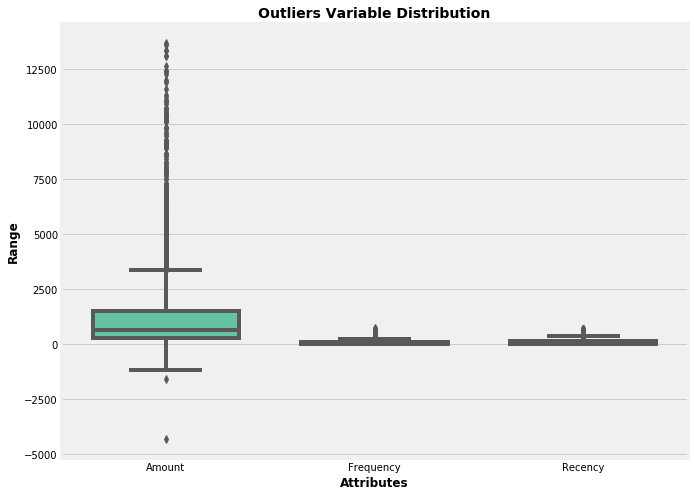

In [36]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

## Scaling Using Standarisasi

In [37]:
# Rescaling the attributes

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [38]:
rfm_df_scaled

array([[-0.72373821, -0.75288754,  1.95465128],
       [ 1.73161722,  1.04246665, -0.54698206],
       [ 0.30012791, -0.46363604, -0.23209115],
       ...,
       [-0.67769602, -0.70301659, -0.86187297],
       [-0.6231313 , -0.64317145, -0.08339267],
       [ 0.32293822, -0.07464263, -0.89686085]])

In [39]:
## Buat dataframe hasil standarisasi tsb

rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,1.954651
1,1.731617,1.042467,-0.546982
2,0.300128,-0.463636,-0.232091
3,0.277517,-0.044720,-0.730668
4,-0.533235,-0.603275,1.823447


## Building Model

### 1. K-Means Clustering

#### Create Number of Cluster Using Elbow Method

In [40]:
# Elbow-curve/SSD

# ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

wcss = []
for i in range_n_clusters:
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(rfm_df_scaled)
    wcss.append(km.inertia_)

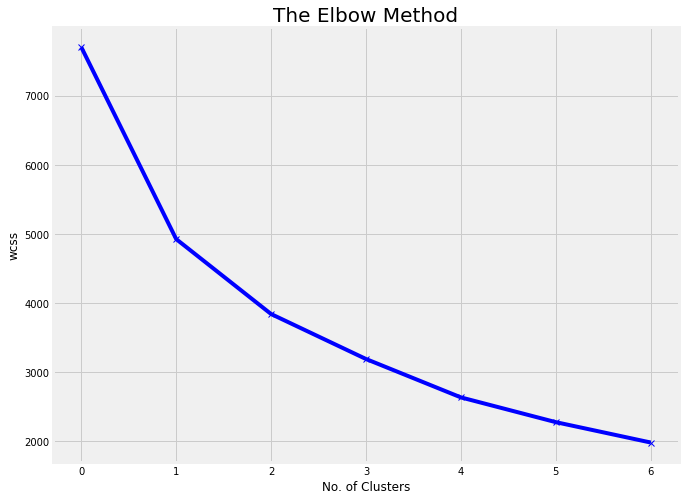

In [41]:
plt.plot(wcss, 'bx-')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

#### Silhouette Analysis

silhouette score=(p−q) / [max(p,q)]

 
> p  is jarak rata2 untuk data point yang dekat dengan cluster terdekat 

>q  yaitu jarak rata2 intra-cluster pada semua data point 


* Rentang nilai yaitu -1 s/d 1

* nilai yang mendekati 1 akan mengindikasikan bahwa data point tersebut sangat mirip dengan data lainnya di cluster tersebut, dan untuk nilai (-1) mengindikasikan bahwa data tersebut tidak mirip

In [42]:
# Silhouette analysis (menampilkan nilai silhouette di semua n_cluster)
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.5501362051961678
For n_clusters=3, the silhouette score is 0.4700476001746889
For n_clusters=4, the silhouette score is 0.4458975279324812
For n_clusters=5, the silhouette score is 0.45430240717798076
For n_clusters=6, the silhouette score is 0.4472417676351518
For n_clusters=7, the silhouette score is 0.4325312590636849
For n_clusters=8, the silhouette score is 0.3948430273438502


In [43]:
## Jumlah kluster optimal yaitu 2
# Final model with k=2
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
kmeans.labels_

array([1, 0, 1, ..., 1, 1, 1])

In [45]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,326,1
1,12347.0,4310.00,182,40,0
2,12348.0,1797.24,31,76,1
3,12349.0,1757.55,73,19,1
4,12350.0,334.40,17,311,1


In [46]:
rfm.Cluster_Id.value_counts()

1    3652
0     641
Name: Cluster_Id, dtype: int64

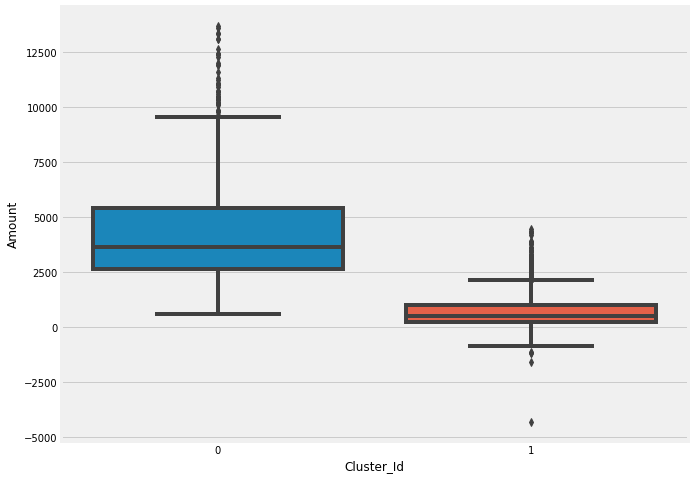

In [47]:
### Box plot to visualize Cluster Id vs Amount(Monetery) total amount of transactions

sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

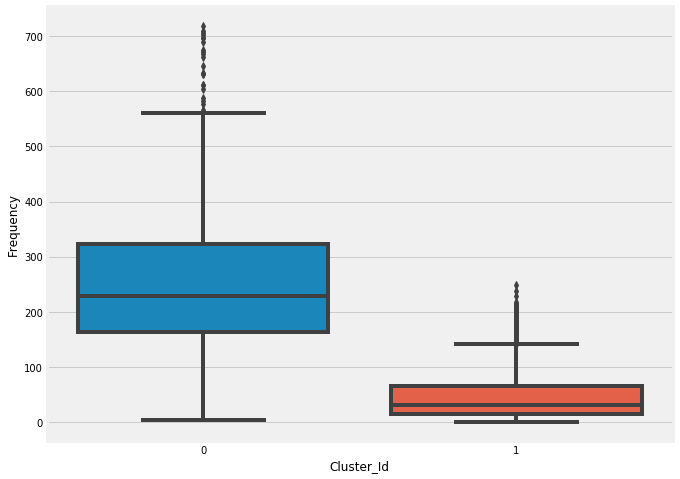

In [48]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

In [50]:
rfm['Cluster_Id'].value_counts()

1    3652
0     641
Name: Cluster_Id, dtype: int64

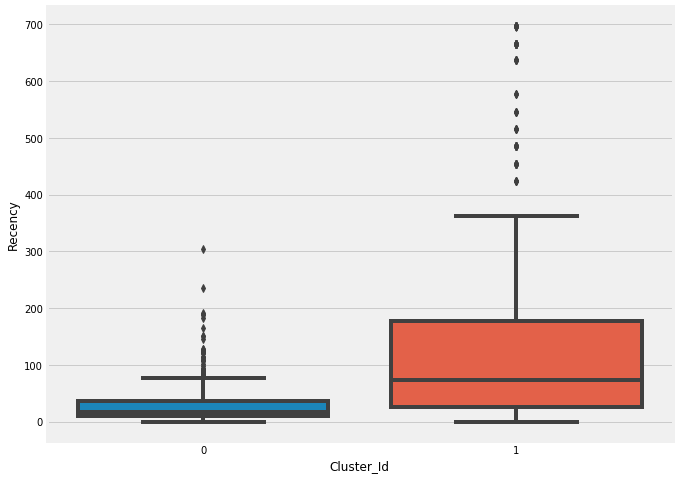

In [51]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

### 2. Hierarchical Clustering

#### A. Single Linkage

jarak antara dua cluster merupakan jarak terdekata antar dua data point di setiap cluster

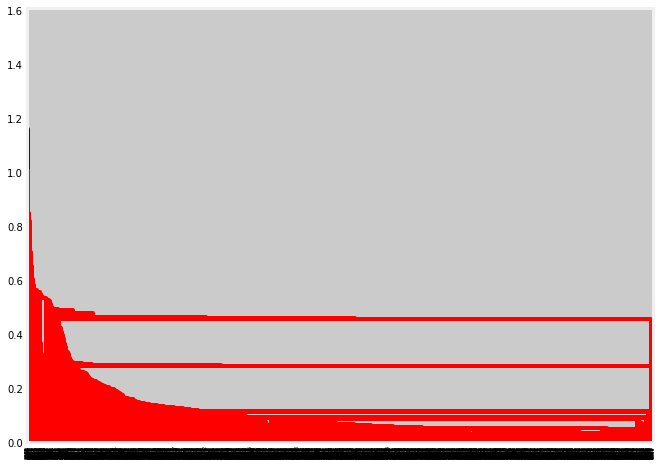

In [52]:
# Single linkage: 

mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

#### B. Complete Linkage

jarak antara dua cluster didefinisikan sebagai jarak terjauh antar dua data point di setiap cluster

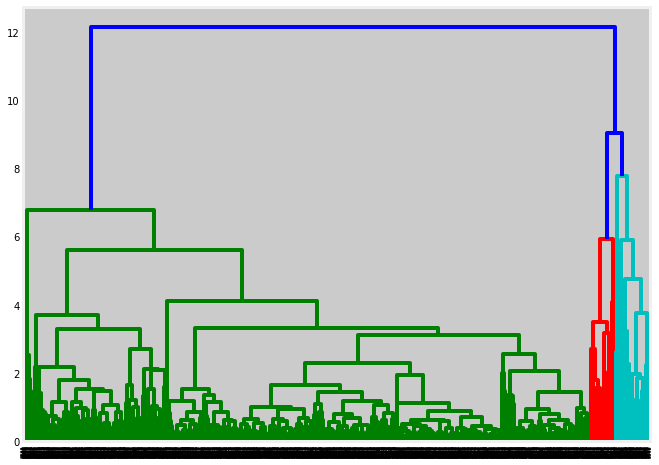

In [53]:
# Complete linkage

mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

#### C. Average Linkage

jarak antara dua cluster didefinisikan sebagai jarak rata2 antara setiap data point di suatu cluster untuk setiap data point di cluster lain

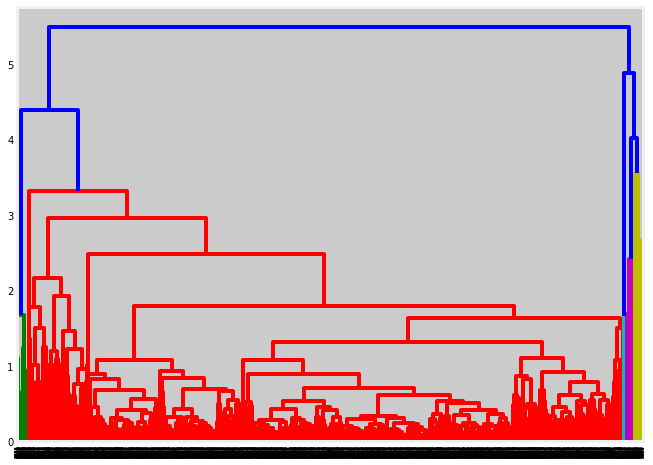

In [54]:
# Average linkage

mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

### Cutting The Dendogram based on K

In [56]:
# 2 clusters
cluster_labels = cut_tree(mergings, n_clusters=2).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
# Assign cluster labels

rfm['Cluster_Labels'] = cluster_labels
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id,Cluster_Labels
0,12346.0,0.00,2,326,1,0
1,12347.0,4310.00,182,40,0,0
2,12348.0,1797.24,31,76,1,0
3,12349.0,1757.55,73,19,1,0
4,12350.0,334.40,17,311,1,0


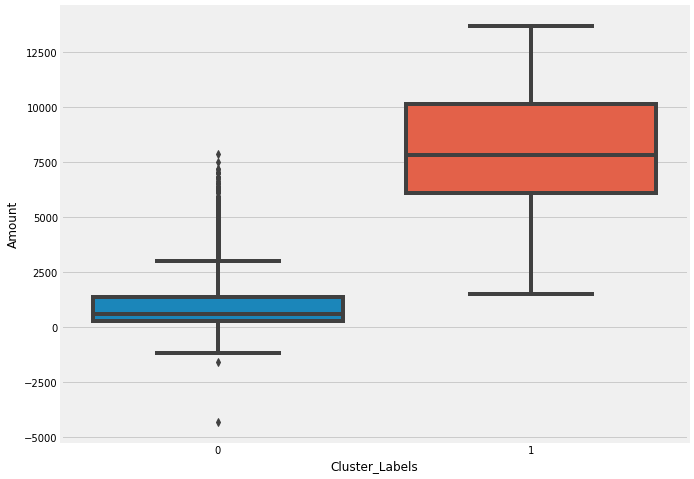

In [58]:
# Plot Cluster Id vs Amount

sns.boxplot(x='Cluster_Labels', y='Amount', data=rfm)

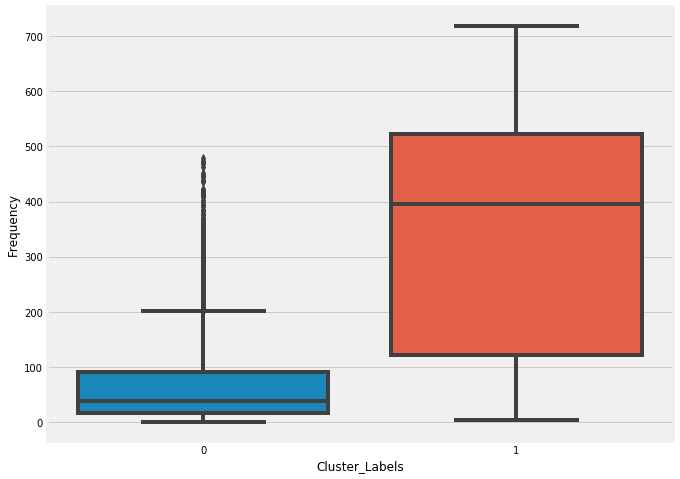

In [59]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='Cluster_Labels', y='Frequency', data=rfm)

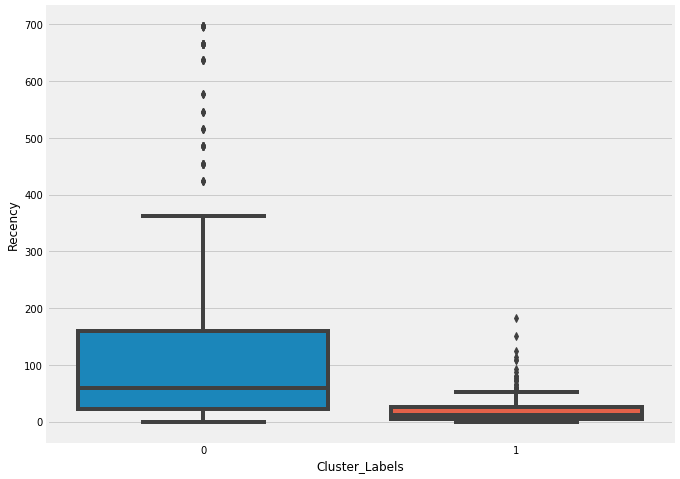

In [60]:
# Plot Cluster Id vs Recency

sns.boxplot(x='Cluster_Labels', y='Recency', data=rfm)

## Final Analysis

### K-Means

* Cluster 0 = memiliki high amoun transactions dan frequency dibandingkan dengan cluster lainnya
* Cluster 1 = memiliki recency paling tinggi dibandingkan dengan cluster lainnya

### Hierarchical 

* Cluster 0 = memiliki recency paling byk dibandingkan dengan cluster lainnya
* Cluster 1 = memiliki high Amount transactions dan Frequency paling tinggi dibandingkan cluster lainnya